In [1]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt
import json
import requests
import time

### Run performance test

In [2]:
def performance_test(start, length):
  max_iters = start + length
  i = start
  word_count = []
  duration = []
  correct = []

  questions = []
  got_answer = []
  actual_answer = []

  url = "http://3.135.244.37:8000/qa"


  with open('coqa-dev-v1.0.json', 'r') as f:
    data = json.load(f)

    while i < max_iters:
      i+=1
      sample = data["data"][i]

      context = sample["story"]
      question = sample["questions"][0]["input_text"]
      answer = sample["answers"][0]["input_text"]
      text = {"question": question, "context": context}
      current_time = time.time()
      response = requests.get(url=url, json=text)
      took = time.time() - current_time
      current_time = time.time()

      # print(f"got: {response.text}")
      # print(f"answer: {answer}")
      
      word_count += [len(context.split())]
      duration += [took]
      correct += [response.text.lower() in answer.lower()]
      got_answer += [response.text]
      actual_answer += [answer]
      questions += [question]
      print(i, end = "\r")

  data = {"word count" : word_count,
  "time took" : duration,
  "correct" : correct,
  "question" : questions,
  "chatbot says" : got_answer,
  "actual answer" : actual_answer
  }

  return pd.DataFrame(data)

In [3]:
results = []

for i in range(3):
  start = random.randint(0, 480)
  print(start)
  results += [performance_test(start, 20)]

344
364
255


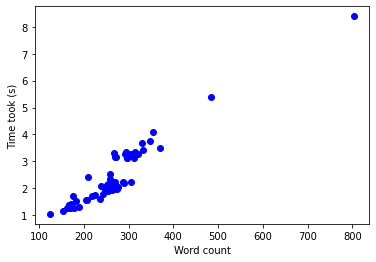

In [4]:
for d in results:
  plt.scatter(list(d['word count']), list(d['time took']), color="blue")
  plt.xlabel("Word count")
  plt.ylabel("Time took (s)")

### Concatenate 2 passages to get longer more complex passage

In [11]:
def performance_test_2(start, length):
  max_iters = start + length
  i = start
  word_count = []
  duration = []
  correct = []

  questions = []
  got_answer = []
  actual_answer = []

  url = "http://3.135.244.37:8000/qa"


  with open('coqa-dev-v1.0.json', 'r') as f:
    data = json.load(f)

    while i < max_iters:
      i+=1
      sample1 = data["data"][i]
      sample2 = data["data"][i+10]

      context = sample1["story"] + sample2["story"]
      question1 = sample1["questions"][0]["input_text"]
      question2 = sample2["questions"][0]["input_text"]
      answer1 = sample1["answers"][0]["input_text"]
      answer2 = sample2["answers"][0]["input_text"]

      current_time = time.time()
      response1 = requests.get(url=url, json={"question": question1, "context": context})
      took1 = time.time() - current_time
      current_time = time.time()

      response2 = requests.get(url=url, json={"question": question2, "context": context})
      took2 = time.time() - current_time
      current_time = time.time()

      # print(f"got: {response.text}")
      # print(f"answer: {answer}")
      
      word_count += [len(context.split()), len(context.split())]
      duration += [took1, took2]
      # correct += [response.text.lower() in answer.lower()]
      got_answer += [response1.text, response2.text]
      actual_answer += [answer1, answer2]
      questions += [question1, question2]
      print(i, end = "\r")

  data = {"word count" : word_count,
  "time took" : duration,
  # "correct" : correct,
  "question" : questions,
  "chatbot says" : got_answer,
  "actual answer" : actual_answer
  }

  return pd.DataFrame(data)

In [12]:
results += [performance_test_2(150, 10)]

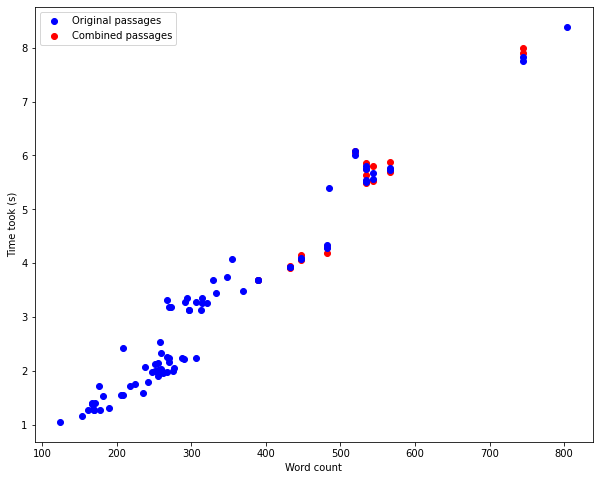

In [13]:
plt.figure(figsize= (10,8))
for idx, d in enumerate(results):
  if idx==3:
    plt.scatter(list(d['word count']), list(d['time took']), color="red", label = "Combined passages")
  elif idx==0:
    plt.scatter(list(d['word count']), list(d['time took']), color="blue", label = "Original passages")
  else:
    plt.scatter(list(d['word count']), list(d['time took']), color="blue")
  
plt.xlabel("Word count")
plt.ylabel("Time took (s)")
plt.legend()


### Evaluating "incorrect" answers by hand

In [151]:
concated = pd.concat(results)
chatbot = []
actual = []
question = []
x = concated.reset_index()

for index, row in concated.iterrows():
  a = row['chatbot says'].lower()
  b = row['actual answer'].lower()
  
  if (a.find(b) < 0 and b.find(a) < 0) :
    print(a + " /// " + b)
    chatbot += [row['chatbot says']]
    actual += [row['actual answer']]
    question += [row['question']]

pd.DataFrame({"question":question, "chatbot says":chatbot, "actual answer":actual})

picnic supper /// a picnic
law enforcement, however, constitutes only part of policing activity /// no
harper /// joe ladue
nba /// basketball
elevator engine /// lifts,or elevators
the national assembly for wales /// the welsh assembly
arab spring audio message /// an audio message purportedly recorded by osama bin laden
the united states /// united states.
his father and grandfather /// bill gates
one world, one dream /// the 2008 summer olympics torch relay
carmen miranda /// shakira, christina aguilera, and pitbull
great plains /// midwestern
studied for evidence of a disease striking football players /// given to the nfl's brain bank
china /// great britain
floyd mayweather and filipino manny pacquiao /// floyd mayweather and manny pacquiao
furthering access to the world's information and reducing information costs /// oclc
shall we go inside /// no
a young girl and her dog /// a girl and a dog.
savonarola /// fra girolamo
jenny helped her mom pack boxes /// yes
injuries in a ski 

,question,chatbot says,actual answer
0,what was being planned?,picnic supper,a picnic
1,Is enforcing the law the entire goal of police?,"Law enforcement, however, constitutes only par...",No
2,Who advised Daylight about the number of moose?,Harper,Joe Ladue
3,What sport was Rodman in?,NBA,basketball
4,What is the primary device mentioned here?,elevator engine,"lifts,or elevators"
5,what is it commonly known as,The National Assembly for Wales,the Welsh Assembly
6,What was posted online?,Arab Spring audio message,an audio message purportedly recorded by Osama...
7,Who is this place a part of?,the United States,United States.
8,Who is the story about?,his father and grandfather,Bill Gates
9,What is the topic?,"one world, one dream",The 2008 Summer Olympics torch relay


11 out of 80 answers (rows 1, 2, 3, 8, 9, 10, 13, 16, 18, 22, 24) are unacceptable

### Looking at shorter vs. longer passages

In [150]:
with open('coqa-dev-v1.0.json', 'r') as f:
    data = json.load(f)
    found = False
    i = 200
    while not found:
      i+=1
      sample = data["data"][i]

      context = sample["story"]
      question = sample["questions"][0]["input_text"]
      answer = sample["answers"][0]["input_text"]
      text = {"question": question, "context": context}
      current_time = time.time()
      # response = requests.get(url=url, json=text)
      took = time.time() - current_time
      current_time = time.time()

      # print(f"got: {response.text}")
      # print(f"answer: {answer}")
      
      if len(context.split()) < 200:
        print(question + "\n" + context)
        found = True
        
        print("-----------------------------------")

    found = False 
    
    while not found:
      i+=1
      sample = data["data"][i]

      context = sample["story"]
      question = sample["questions"][0]["input_text"]
      answer = sample["answers"][0]["input_text"]
      text = {"question": question, "context": context}
      current_time = time.time()
      # response = requests.get(url=url, json=text)
      took = time.time() - current_time
      current_time = time.time()

      # print(f"got: {response.text}")
      # print(f"answer: {answer}")
      if len(context.split()) > 300:
        print(question + "\n" + context)
        found = True

What is in the second drawing?
I'm Leo. There is a great artist in my family. She is Lisa. Lisa likes drawing a lot. Here are her three drawings. There is an animal in the first drawing. It has two big eyes, a big mouth and two small ears. It has long arms and long legs. It is black and white. There are some apples in its hands. It looks very happy. What is it? I don't know, but Lisa says it is a panda. There is a woman in the second drawing. She is thin. She has straight blonde hair, a small mouth, a big nose and two big eyes. She looks angry. Who is she? Lisa says she is our mom. But Mom has curly blonde hair, small eyes and a small nose. There is an animal in the third drawing, too. Its head is an apple. Its hair and tail are leaves. It has a long mouth, and _ is a banana. Its two legs are carrots. What is it? Lisa says it is a horse, but it doesn't look like a horse. Lisa is really a great artist, isn't she? .
-----------------------------------
what is it commonly known as
The Nat